# House Prices - Advanced Regression Techniques

**Target from the dataset to predict house prices, to do this we will make it simple for beginner and use different models to predict price begin with Simple Linear Regression and ending with XGBoosting and optimizing the model to get better results.**
* Simple Linear Regresion
* Multible Linear Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting with XGBoost

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
# Read the data
X_full = pd.read_csv('C:/Users/85059/Desktop/DATA7703 Machine Learning/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
X_test_full = pd.read_csv('C:/Users/85059/Desktop/DATA7703 Machine Learning/house-prices-advanced-regression-techniques/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)

# 1- Simple Linear Regression

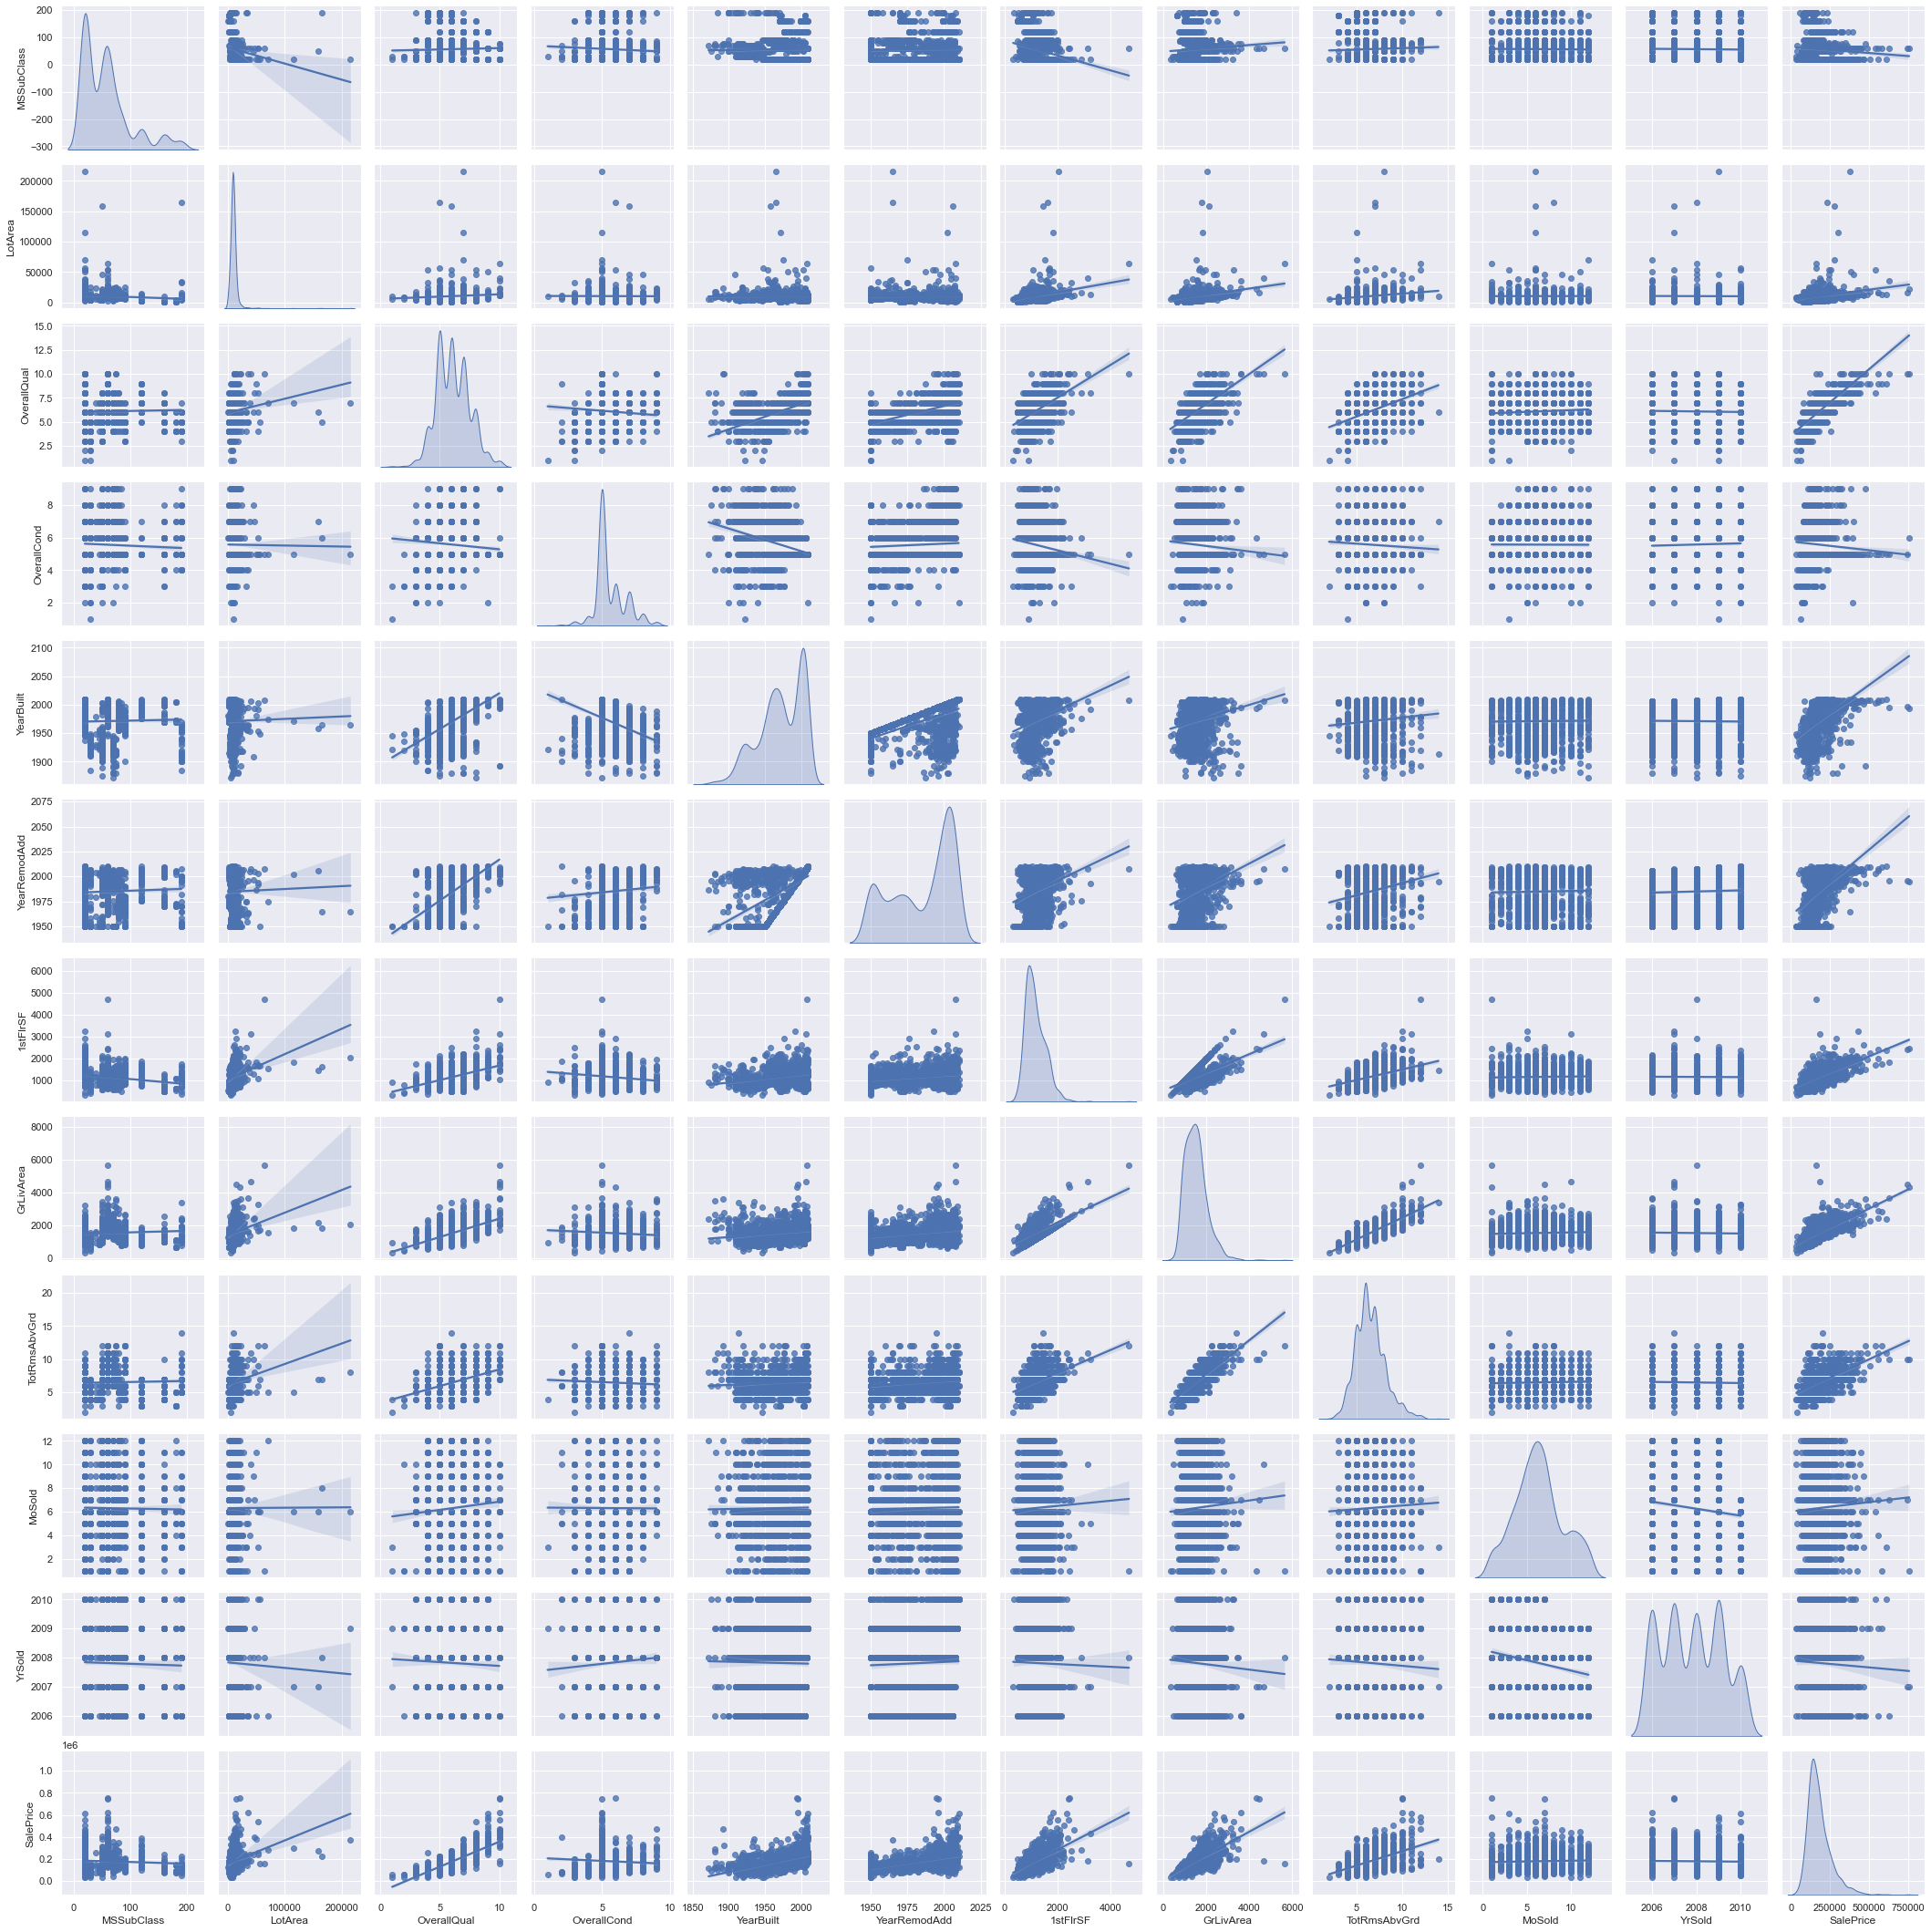

In [4]:
#first lets get only numeric columns
X_lre = X_full.select_dtypes(exclude='object').copy()

#there all too many columns with 0 value, this 0 value represnt this value doent exist
#so to make it simple lets replace all 0 value with NAN and drop all cloumn with NaN values
X_lre = X_lre.replace(0,np.nan).dropna(axis=1)

sns.set()
sns.pairplot(X_lre,diag_kind='kde',kind ='reg')
plt.show()


In [5]:
X_slr = X_lre[['OverallQual']]
y = X_lre['SalePrice']
train_x, valid_x, train_y, valid_y = train_test_split(X_slr,y,train_size=0.8,random_state=0)

simple_linear = LinearRegression()
simple_linear.fit(train_x, train_y)

prediction = simple_linear.predict(valid_x)

mae_simple = mean_absolute_error(prediction,valid_y)
print('MAE Simple Linear Regression: ',mae_simple)

MAE Simple Linear Regression:  32160.942388859254


In simple linear regression we got 32160,9 mean error and this is so hgieh value, so will use multiple lienar regression and see if we can reduce this error or not!

# 2- Multiple Linear Regression

In [6]:
#first lets get column with linear correlation wih price 
X_mlr = X_lre[['LotArea','OverallQual','YearBuilt','YearRemodAdd','1stFlrSF','GrLivArea','TotRmsAbvGrd']]

X_train, X_valid, y_train, y_valid = train_test_split(X_mlr, y, train_size=0.8, test_size=0.2,random_state=0)
                                                      

multiple_linear = LinearRegression()
multiple_linear.fit(X_train, y_train)
prediction1 = multiple_linear.predict(X_valid)

mae_mulitable = mean_absolute_error(prediction1, y_valid)
print('MAE Multiple Linear Regression: ',mae_mulitable)

MAE Multiple Linear Regression:  26539.198861902212


For Multiple Linear Regression as expected we got MAE lower than simple Linear Regression, but we can imporve our modern more by using Descion tree regressor, so lets build our model.

# 3- Decision Tree Regressor

In [7]:
#function to find best result based on Max leaf nodes
def get_mae_dtr(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)    

In [8]:
#will use same column from Multibale Linear Regression as indepentant varialbe
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae_dtr(leaf_size, X_train, X_valid, y_train, y_valid) for leaf_size in range(5,1000,50)}
best_tree_size = min(scores, key=scores.get)

mae_decision = scores[best_tree_size]
print('Best result at max leaf nodes : ',best_tree_size)
print('MAE for Decision Tree Regressor: ',mae_decision)

Best result at max leaf nodes :  55
MAE for Decision Tree Regressor:  24344.981974525195


For Decision Tree Regressor we got better result 24344,9, we can improve our model by using Random Forest Regressor, so lets build the model.

# 4- Random Frost Regressor

In [9]:
#function to find best result based on n_estimators
def get_mae_rfr(n_estimators, train_X, val_X, train_y, val_y):
    model = RandomForestRegressor(n_estimators= n_estimators, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)    

In [10]:
#will use same column from Multibale Linear Regression as indepentant varialbe
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
scores = {leaf_size: get_mae_rfr(leaf_size, X_train, X_valid, y_train, y_valid) for leaf_size in range(5,1000,50)}
best_tree_size = min(scores, key=scores.get)

mae_forest = scores[best_tree_size]
print('Best result at max leaf nodes : ',best_tree_size)
print('MAE for Decision Tree Regressor: ', mae_forest)

Best result at max leaf nodes :  355
MAE for Decision Tree Regressor:  19336.397775098074


# 5- Gradient Boosting with XGBoost

In [11]:
my_model_3 = XGBRegressor(n_estimators=350, learning_rate=0.05)

# Fit the model
my_model_3.fit(X_train,y_train)              
predictions_3 = my_model_3.predict(X_valid)

# Calculate MAE
mae_xg = mean_absolute_error(predictions_3, y_valid)

print("MAE for XGBoost:" , mae_xg)


MAE for XGBoost: 19153.145695098458


# 6- optimize Model

**Until now we use only Numerical column, so to optimize model more will use Categorical and numerical columns.**

In [12]:
# Break off validation set from training data
y = X_full.SalePrice
X_full.drop(['SalePrice'], axis=1, inplace=True)

X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y,train_size=0.8, test_size=0.2, random_state=0)
                                                                                                                  
# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [13]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

model= XGBRegressor(n_estimators=350, learning_rate=0.05)

# Bundle preprocessing and modeling code in a pipeline
pipe_model = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])
# Preprocessing of training data, fit model 
pipe_model.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = pipe_model.predict(X_valid)

mae_optimize = mean_absolute_error(y_valid, preds)
print('MAE after model opimization:', mae_optimize)

MAE after model opimization: 16946.03974475599


we got better result by using noth categorical and numerical columns.

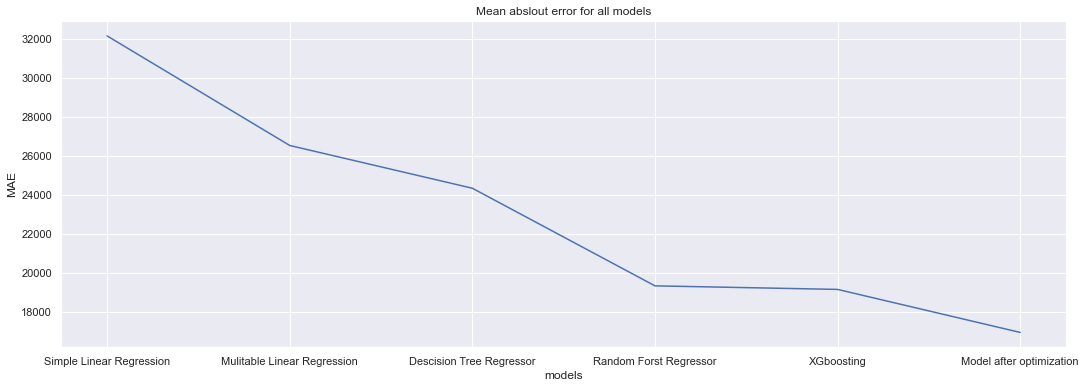

In [14]:
mae = {'Simple Linear Regression':mae_simple,
       'Mulitable Linear Regression':mae_mulitable,
      'Descision Tree Regressor': mae_decision,
      'Random Forst Regressor': mae_forest,
      'XGboosting':mae_xg,
      'Model after optimization': mae_optimize}

plt.figure(figsize=(18,6))
sns.lineplot(x=mae.keys(),y=mae.values())
plt.title('Mean abslout error for all models')
plt.xlabel('models')
plt.ylabel('MAE')
plt.show();

In [15]:
# Preprocessing of test data, fit model
preds_test = pipe_model.predict(X_test) 

In [16]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)